In [1]:
    import numpy as np
    import pandas as pd
    import itertools

# Import the dataset

In [2]:
    #Read the data
    df=pd.read_csv('news.csv')
    #Get head
    df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
    #DataFrame - Get the labels
    labels=df.label
    labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
    #Get shape
    df.shape

(6335, 4)

In [5]:
df.groupby('label').describe()

Unnamed: 0                                                              \
           count         mean          std     min      25%     50%      75%   
label                                                                          
FAKE      3164.0  7912.297092  1514.701524  5280.0  6627.75  7904.0  9231.25   
REAL      3171.0  2654.344056  1531.720152     2.0  1317.50  2676.0  3992.50   

                
           max  
label           
FAKE   10557.0  
REAL    5276.0

#                                                    Data Preprocessing

In [6]:
#drop unnecessary column => Unnamed: 0
#to_drop = ['Unnamed: 0']

In [7]:
#df.drop(to_drop, inplace=True, axis=1)
  #axis=1 ==> column, axis=0 ==> row

In [8]:
#df.head()

### Handle missing data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [10]:
#counting null value for each column
  #df.isnull().sum()

In [11]:
#checking null by-> title
#df[df.title.isnull()]

#checking null by-> text
  #df[df.text.isnull()]

#checking null by-> label
  #df[df.label.isnull()]

### Convert FAKE as 0 and REAL as 1

In [12]:
df.loc[df["label"]=='REAL',"label"]=1
df.loc[df["label"]=='FAKE',"label"]=0

In [13]:
df.groupby('label').describe()

Unnamed: 0                                                              \
           count         mean          std     min      25%     50%      75%   
label                                                                          
0         3164.0  7912.297092  1514.701524  5280.0  6627.75  7904.0  9231.25   
1         3171.0  2654.344056  1531.720152     2.0  1317.50  2676.0  3992.50   

                
           max  
label           
0      10557.0  
1       5276.0

In [14]:
df_x=df["title"]
df_y=df["label"]

In [15]:
df_x
df_y

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

###  Text Preprocessing

In [16]:
#Once the dataset has been imported, the next step is to preprocess the text. Text may contain numbers, special characters, 
#and unwanted spaces. Depending upon the problem we face, we may or may not need to remove these special characters and 
#numbers from text.

documents = []
from nltk.stem import WordNetLemmatizer
import re
#Regex Expressions from Python re library 
import nltk
#nltk.download('wordnet')



stemmer = WordNetLemmatizer()

for sen in range(0, len(df_x)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(df_x[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

## TfidfVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
#1500 most occurring words as features
#min_df=5. minimum number of row that should contain this feature. include those words that occur in at least 5 rows. 
#0.7 means that we should include only those words that occur in a maximum of 70% of all the rows
df_x = tfidfconverter.fit_transform(documents).toarray()
#Term frequency = (Number of Occurrences of a word)/(Total words in the document)
#IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

In [18]:
df_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Training and Testing Sets Split


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=7)
#The above script divides data into 20% test set and 80% training set
print(x_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.55657207 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Creating Model with Supervised Learning

## RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.cm as cm

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       638
           1       0.80      0.80      0.80       629

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267

Accuracy: 0.8026835043409629


## KNN algorithm 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#k=5
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[519 119]
 [353 276]]
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       638
           1       0.70      0.44      0.54       629

    accuracy                           0.63      1267
   macro avg       0.65      0.63      0.61      1267
weighted avg       0.65      0.63      0.61      1267

Accuracy: 0.6274664561957379


### Comparing Error Rate with the K Value

In [27]:
#we will plot the mean error for the predicted values of test set for all the K values between 1 and 40
#K ranges from 1 and 40

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


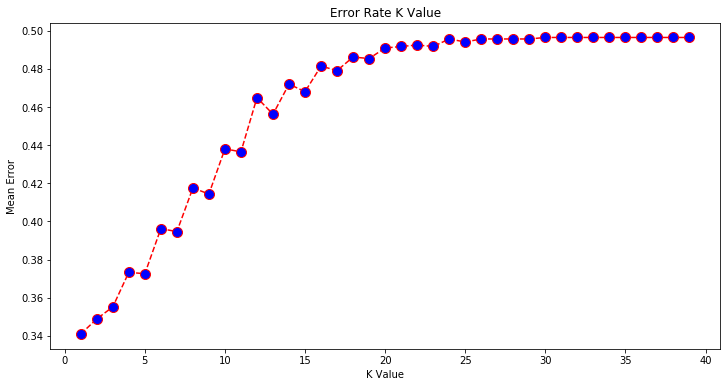

In [28]:
#plot the error values against K values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

##  SVM 

In [29]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[472 166]
 [175 454]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       638
           1       0.73      0.72      0.73       629

    accuracy                           0.73      1267
   macro avg       0.73      0.73      0.73      1267
weighted avg       0.73      0.73      0.73      1267

Accuracy: 0.7308602999210734


## Kernel SVM

### 1.Polynomial Kernel

In [30]:
svclassifier = SVC(kernel='poly', degree=8)
#degree of the polynomial
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 58 580]
 [  7 622]]
              precision    recall  f1-score   support

           0       0.89      0.09      0.17       638
           1       0.52      0.99      0.68       629

    accuracy                           0.54      1267
   macro avg       0.70      0.54      0.42      1267
weighted avg       0.71      0.54      0.42      1267

Accuracy: 0.5367008681925809


### 2. Gaussian Kernel

In [31]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[520 118]
 [164 465]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       638
           1       0.80      0.74      0.77       629

    accuracy                           0.78      1267
   macro avg       0.78      0.78      0.78      1267
weighted avg       0.78      0.78      0.78      1267

Accuracy: 0.7774269928966061


### 3. Sigmoid Kernel

In [32]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[512 126]
 [154 475]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       638
           1       0.79      0.76      0.77       629

    accuracy                           0.78      1267
   macro avg       0.78      0.78      0.78      1267
weighted avg       0.78      0.78      0.78      1267

Accuracy: 0.7790055248618785


## DecisionTree

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
3534,1,1
6265,0,0
3123,1,0
3940,1,1
2856,1,1
...,...,...
4986,1,1
5789,1,1
4338,1,0
5924,0,1


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.22099447513812154
Mean Squared Error: 0.22099447513812154
Root Mean Squared Error: 0.47010049472226845
Accuracy: 0.7790055248618785


##  Naive Bayes

### 1. Bernoulli  

In [36]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[537 101]
 [127 502]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       638
           1       0.83      0.80      0.81       629

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

Accuracy: 0.8200473559589582


### 2. Gaussian 

In [37]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[384 254]
 [106 523]]
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       638
           1       0.67      0.83      0.74       629

    accuracy                           0.72      1267
   macro avg       0.73      0.72      0.71      1267
weighted avg       0.73      0.72      0.71      1267

Accuracy: 0.7158642462509865


## Regression Logistic 

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[481 157]
 [170 459]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       638
           1       0.75      0.73      0.74       629

    accuracy                           0.74      1267
   macro avg       0.74      0.74      0.74      1267
weighted avg       0.74      0.74      0.74      1267

Accuracy: 0.7419100236779794


## Linear Discriminant Analysis -- LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


y_pred=lda.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[502 136]
 [155 474]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       638
           1       0.78      0.75      0.77       629

    accuracy                           0.77      1267
   macro avg       0.77      0.77      0.77      1267
weighted avg       0.77      0.77      0.77      1267

Accuracy: 0.7703235990528808


## PassiveAggressiveClassifier

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[478 160]
 [181 448]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       638
           1       0.74      0.71      0.72       629

    accuracy                           0.73      1267
   macro avg       0.73      0.73      0.73      1267
weighted avg       0.73      0.73      0.73      1267

Accuracy: 0.7308602999210734


## GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[564  74]
 [247 382]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       638
           1       0.84      0.61      0.70       629

    accuracy                           0.75      1267
   macro avg       0.77      0.75      0.74      1267
weighted avg       0.77      0.75      0.74      1267

Accuracy: 0.7466456195737964
